<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #10: Visualizaciones para NLP

Realice una nube de palabra sobre cualquier corpus (excepto el que usamos en la clase como ejemplo). 


`Fecha de entrega: Mayo 13, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Puede subir link de Tableau Public o Jupyter Notebook.`

In [14]:
import pandas as pd
import numpy as np
import re

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words("spanish")

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [15]:
data = pd.read_csv('epsPQRS.csv', sep=';')
data

,Comentario,Area
0,pqrd-18-0674823nurc 1-2018-221502entidad: capi...,Negación De Servicios
1,pqrd-18-0675272nurc 1-2018-216612entidad: capi...,Negación De Servicios
2,pqrd-18-0675410nurc 1-2018-221583entidad: capi...,Dificultad Accesibilidad Administrativa
3,pqrd-18-0675530nurc 1-2018-217812entidad: capi...,Negación De Servicios
4,favor enviar copia al ministerio de salud y pr...,Dificultad Tutelas
...,...,...
77821,ss vacunas antigeno del virus de hepatitis b 2...,No Suministro Medicamentos
77822,apixaban 5 mg tableta,Caso Ya Registrado
77823,ss solucion mipres 20201123175024488426,Negación De ServiciosDificultad MédicoAdmin
77824,ss implante de dispositivo en cornea asistido,Negación De ServiciosDificultad MédicoAdmin


In [16]:
stopwords.extend(["pqrd", "entidad", "nurc", "dia", "capital", "salud","bogotá"])
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

data['pp'] = data.Comentario.apply(lambda texto: pre_procesado(texto))
data.head()

,Comentario,Area,pp
0,pqrd-18-0674823nurc 1-2018-221502entidad: capi...,Negación De Servicios,d c canal webtipo reclamo saludinicio pmvencim...
1,pqrd-18-0675272nurc 1-2018-216612entidad: capi...,Negación De Servicios,d c riesgo vidacanal webtipo reclamo saludinic...
2,pqrd-18-0675410nurc 1-2018-221583entidad: capi...,Dificultad Accesibilidad Administrativa,d c riesgo vidacanal webtipo reclamo saludinic...
3,pqrd-18-0675530nurc 1-2018-217812entidad: capi...,Negación De Servicios,d c riesgo vidacanal webtipo reclamo saludinic...
4,favor enviar copia al ministerio de salud y pr...,Dificultad Tutelas,favor enviar copia ministerio proteccion socia...


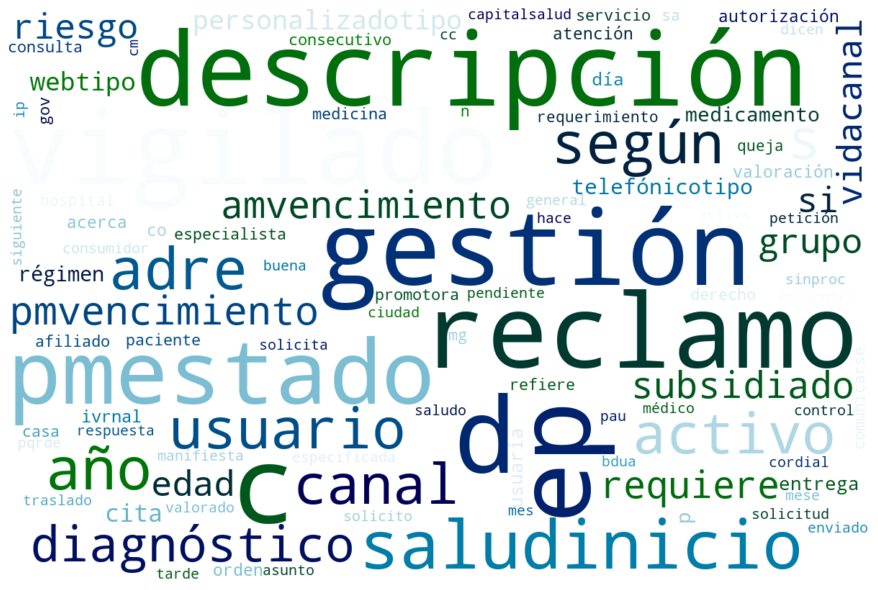

In [20]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=1200, 
                      height=800,
                      max_font_size=150, 
                      max_words=100,
                      background_color="white", 
                      colormap="ocean",
                      stopwords=stopwords,
                      collocations=False).generate(palabras) 
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()